In [1]:
# What is Reinforcement Learning?
# Similar to how humans learn
#
# Agent performs an action (on the)-> Environment (gives)-> Feedback to the agent (current state + a reward).
# The agent learns to make those actions if it gets a positive reward
# , but not to make them if it gets a negative reward (reinforcement learning).
# After many of these cycles, the agent learns how to optimally act on the environment for each state


# What is Nim?
#   2 player game where players take turns making moves (all impartial games are like this)
#
#   The game starts with an arbitrary number of heaps. Each heap has an arbitrary number of elements
#
#   In one move:
#     a player selects any heap (with a positive number of stones)
#     the player selects any positive number of elements and remove them from the heap
#
# Example of a game of Nim:
#   3 heaps
#   Starting heaps: 10, 2, 1
#
#   The first move: player 1 selects the 1st heap and remove 5 elements
#   Heaps after the first move: 5, 2, 1
#   The second move: player 2 selects the 2nd heap and removes all 2 elements
#   Heaps after the second move: 5, 0, 1
#   The third move: player 1 selects the 1st heap and remove 3 elements
#   Heaps after the third move: 2, 0, 1
#   ...
#   ...
#   1st player makes a move:
#   After that move: 0, 0, 0
#
#   player 1 wins the game and player 2 loses

In [2]:
# random module for generating random games
from Nim.agents import *
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams # you need to alter rcParams after magic command "%matplotlib inline"
rcParams['figure.figsize'] = (12, 6) # set default figure size
rcParams['figure.facecolor'] = 'w'
from typing import List

In [3]:
# make sure the working directory is that of the script since jupyter notebook
# has a different default working directory specified by the config file (I think)

In [4]:
# Training the Q Agent with the Optimal Agent
QAgent_v_OptimalAgent = QLearningAgent("Q Learning Agents/vs Optimal Agent", 'OptimalAgent', 4, 6, 0.4, 1, 0.05)
str(QAgent_v_OptimalAgent.__dict__)[:1000]  # visually check to make sure nothing looks wrong

"{'obj_dir': 'Q Learning Agents/vs Optimal Agent', 'train_opponent_name': 'OptimalAgent', 'train_opponent': <agents.OptimalAgent object at 0x000002417454C460>, 'num_heaps': 4, 'max_elements': 6, 'alpha': 0.4, 'gamma': 1, 'epsilon': 0.05, 'played_games': 0, 'name': '(Q Agent): train_opponent=OptimalAgent,\\n          num_heaps=4, max_elements=6,\\n          α=0.4, γ=1, ε=0.05', 'ascii_name': '(Q Agent) train_opponent=OptimalAgent, num_heaps=4, max_elements=6, alpha=0.4, gamma=1, epsilon=0.05', 'Q': {(): {}, (1,): {(0, 1): 0}, (2,): {(0, 1): 0, (0, 2): 0}, (3,): {(0, 1): 0, (0, 2): 0, (0, 3): 0}, (4,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0}, (5,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0}, (6,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0}, (1, 1): {(0, 1): 0}, (2, 1): {(0, 1): 0, (0, 2): 0, (1, 1): 0}, (3, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 1): 0}, (4, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (1, 1): 0}, (5, 1): {(0, 1): 0, (0, 2)

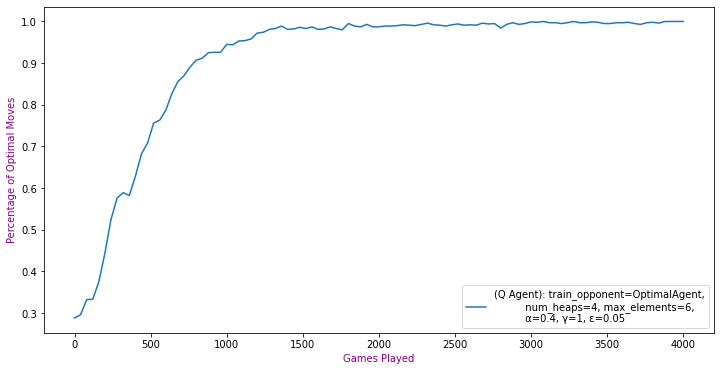

In [5]:
QAgent_v_OptimalAgent.train(4000, 4000 // 100)
QAgent_v_OptimalAgent.save_accuracy_plot()

In [6]:
str(QAgent_v_OptimalAgent.__dict__)[:1000]  # check to see values have converged nicely and nothing weird changed

"{'obj_dir': 'Q Learning Agents/vs Optimal Agent', 'train_opponent_name': 'OptimalAgent', 'train_opponent': <agents.OptimalAgent object at 0x000002417454C460>, 'num_heaps': 4, 'max_elements': 6, 'alpha': 0.4, 'gamma': 1, 'epsilon': 0.05, 'played_games': 4000, 'name': '(Q Agent): train_opponent=OptimalAgent,\\n          num_heaps=4, max_elements=6,\\n          α=0.4, γ=1, ε=0.05', 'ascii_name': '(Q Agent) train_opponent=OptimalAgent, num_heaps=4, max_elements=6, alpha=0.4, gamma=1, epsilon=0.05', 'Q': {(): {}, (1,): {(0, 1): 0.9999999999999999}, (2,): {(0, 1): 0, (0, 2): 0}, (3,): {(0, 1): 0, (0, 2): 0, (0, 3): 0}, (4,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0}, (5,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0}, (6,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0}, (1, 1): {(0, 1): -0.9999999999999999}, (2, 1): {(0, 1): 0.9999999999999998, (0, 2): -0.9999999998267572, (1, 1): -0.9999999998267572}, (3, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 1): 0}, 

In [7]:
# Training the Q Agent with itself
QAgent_v_QAgent = QLearningAgent("Q Learning Agents/vs Q Agent", 'self', 4, 6, 0.4, 1, 0.05)
str(QAgent_v_QAgent.__dict__)[:1000]  # visually check to make sure nothing looks wrong

"{'obj_dir': 'Q Learning Agents/vs Q Agent', 'train_opponent_name': 'self', 'train_opponent': <agents.QLearningAgent object at 0x0000024174A135E0>, 'num_heaps': 4, 'max_elements': 6, 'alpha': 0.4, 'gamma': 1, 'epsilon': 0.05, 'played_games': 0, 'name': '(Q Agent): train_opponent=self,\\n          num_heaps=4, max_elements=6,\\n          α=0.4, γ=1, ε=0.05', 'ascii_name': '(Q Agent) train_opponent=self, num_heaps=4, max_elements=6, alpha=0.4, gamma=1, epsilon=0.05', 'Q': {(): {}, (1,): {(0, 1): 0}, (2,): {(0, 1): 0, (0, 2): 0}, (3,): {(0, 1): 0, (0, 2): 0, (0, 3): 0}, (4,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0}, (5,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0}, (6,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0}, (1, 1): {(0, 1): 0}, (2, 1): {(0, 1): 0, (0, 2): 0, (1, 1): 0}, (3, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 1): 0}, (4, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (1, 1): 0}, (5, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (

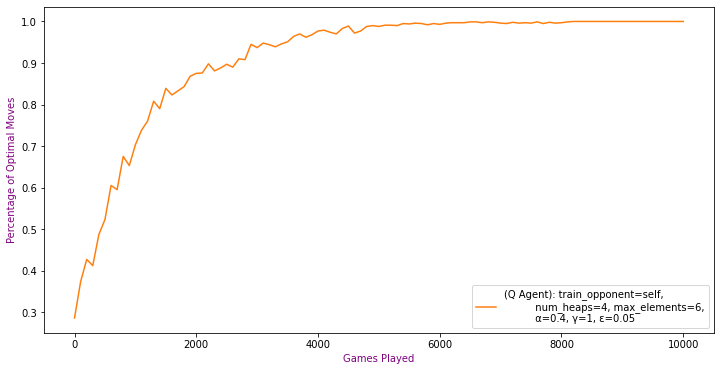

In [8]:
QAgent_v_QAgent.train(10**4, 10**4 // 100)
QAgent_v_QAgent.save_accuracy_plot(color='tab:orange')

In [9]:
str(QAgent_v_QAgent.__dict__)[:1000]  # check to see values have converged nicely and nothing weird changed

"{'obj_dir': 'Q Learning Agents/vs Q Agent', 'train_opponent_name': 'self', 'train_opponent': <agents.QLearningAgent object at 0x0000024174A135E0>, 'num_heaps': 4, 'max_elements': 6, 'alpha': 0.4, 'gamma': 1, 'epsilon': 0.05, 'played_games': 10000, 'name': '(Q Agent): train_opponent=self,\\n          num_heaps=4, max_elements=6,\\n          α=0.4, γ=1, ε=0.05', 'ascii_name': '(Q Agent) train_opponent=self, num_heaps=4, max_elements=6, alpha=0.4, gamma=1, epsilon=0.05', 'Q': {(): {}, (1,): {(0, 1): 0.9999999999999999}, (2,): {(0, 1): -0.9533440000000001, (0, 2): 0.9999999999999999}, (3,): {(0, 1): -0.8704000000000001, (0, 2): -0.8704000000000001, (0, 3): 0.9999999999999999}, (4,): {(0, 1): -0.784, (0, 2): -0.9222400000000001, (0, 3): -0.8704000000000001, (0, 4): 0.9999999999999999}, (5,): {(0, 1): -0.4, (0, 2): -0.4, (0, 3): -0.4, (0, 4): -0.4, (0, 5): 0.9999868378296158}, (6,): {(0, 1): -0.4, (0, 2): -0.64, (0, 3): -0.4, (0, 4): -0.4, (0, 5): -0.4, (0, 6): 0.99637202944}, (1, 1): {(0, 

In [10]:
# Training the Q Agent with the Random Agent
QAgent_v_RandomAgent = QLearningAgent("Q Learning Agents/vs Random Agent", 'RandomAgent', 4, 6, 0.4, 1, 0.05)
str(QAgent_v_RandomAgent.__dict__)[:1000]  # visually check to make sure nothing looks wrong

"{'obj_dir': 'Q Learning Agents/vs Random Agent', 'train_opponent_name': 'RandomAgent', 'train_opponent': <agents.RandomAgent object at 0x0000024174A133D0>, 'num_heaps': 4, 'max_elements': 6, 'alpha': 0.4, 'gamma': 1, 'epsilon': 0.05, 'played_games': 0, 'name': '(Q Agent): train_opponent=RandomAgent,\\n          num_heaps=4, max_elements=6,\\n          α=0.4, γ=1, ε=0.05', 'ascii_name': '(Q Agent) train_opponent=RandomAgent, num_heaps=4, max_elements=6, alpha=0.4, gamma=1, epsilon=0.05', 'Q': {(): {}, (1,): {(0, 1): 0}, (2,): {(0, 1): 0, (0, 2): 0}, (3,): {(0, 1): 0, (0, 2): 0, (0, 3): 0}, (4,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0}, (5,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0}, (6,): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0}, (1, 1): {(0, 1): 0}, (2, 1): {(0, 1): 0, (0, 2): 0, (1, 1): 0}, (3, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 1): 0}, (4, 1): {(0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (1, 1): 0}, (5, 1): {(0, 1): 0, (0, 2): 0, 

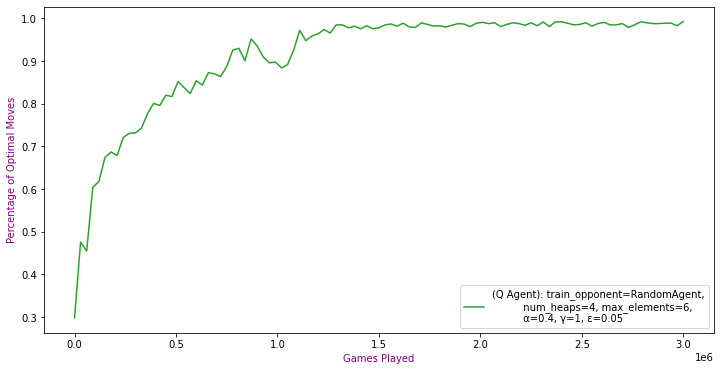

In [11]:
QAgent_v_RandomAgent.train(3*10**6, 3*10**6 // 100)
QAgent_v_RandomAgent.save_accuracy_plot(color='tab:green')

In [12]:
str(QAgent_v_RandomAgent.__dict__ )[:1000] # check to see values have converged nicely and nothing weird changed

"{'obj_dir': 'Q Learning Agents/vs Random Agent', 'train_opponent_name': 'RandomAgent', 'train_opponent': <agents.RandomAgent object at 0x0000024174A133D0>, 'num_heaps': 4, 'max_elements': 6, 'alpha': 0.4, 'gamma': 1, 'epsilon': 0.05, 'played_games': 3000000, 'name': '(Q Agent): train_opponent=RandomAgent,\\n          num_heaps=4, max_elements=6,\\n          α=0.4, γ=1, ε=0.05', 'ascii_name': '(Q Agent) train_opponent=RandomAgent, num_heaps=4, max_elements=6, alpha=0.4, gamma=1, epsilon=0.05', 'Q': {(): {}, (1,): {(0, 1): 0.9999999999999999}, (2,): {(0, 1): -0.9999999999999999, (0, 2): 0.9999999999999999}, (3,): {(0, 1): -0.04912066879200261, (0, 2): -0.9999999999999999, (0, 3): 0.9999999999999999}, (4,): {(0, 1): 0.9981633778592973, (0, 2): -0.6613300716091995, (0, 3): -0.9999999999999999, (0, 4): 0.9999999999999999}, (5,): {(0, 1): -0.013536673238423669, (0, 2): -0.2580648005776348, (0, 3): 0.40333651855424624, (0, 4): -0.9999999999999999, (0, 5): 0.9999999999999999}, (6,): {(0, 1): 

In [13]:
def plot_multiple_accuracy(agents : List[Agent], title: str = None, scale: float = None) -> None:
    """
    **Description:**
        - Plots the accuracies of multiple agents in one plot
    """

    dataframes = [agent.accuracy for agent in agents]

    fig = dataframes[0].plot()
    for i in range(1, len(dataframes)):
        dataframes[i].plot(ax=fig)
    plt.xlabel(dataframes[0].index.name, color="purple")
    plt.ylabel("Percentage of Optimal Moves", color="purple")

    if scale:
        lxlim, rxlim = plt.xlim()
        plt.xlim(lxlim * scale, rxlim * scale)
    if title:
        plt.title(title, color="purple")


def save_multiple_accuracy_plots(agents : List[Agent], title: str = None, scale: float = None) -> None:
    """
    **Description:**
        - Plots the accuracies of multiple agents in one plot and saves it

    """

    plot_multiple_accuracy(agents, title, scale)
    plt.savefig("Q Learning Agents/Joined Plots/" + title + ".png")

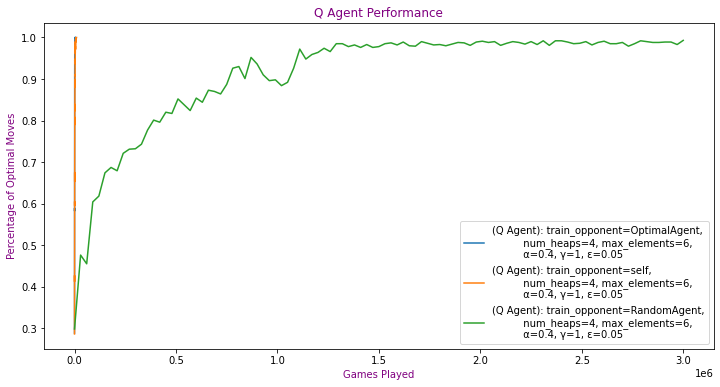

In [14]:
save_multiple_accuracy_plots([QAgent_v_OptimalAgent, QAgent_v_QAgent, QAgent_v_RandomAgent], "Q Agent Performance")

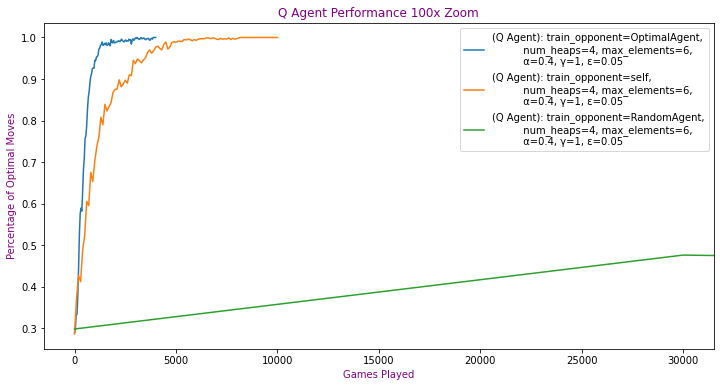

In [15]:
save_multiple_accuracy_plots([QAgent_v_OptimalAgent, QAgent_v_QAgent, QAgent_v_RandomAgent], "Q Agent Performance 100x Zoom", scale=1/100)